In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset = pd.read_csv('emails.csv')
dataset .columns 

Index(['text', 'spam'], dtype='object')

In [5]:
#Checking for duplicates and removing them
dataset.drop_duplicates(inplace = True)
dataset.shape

(5695, 2)

In [6]:
dataset['length'] = dataset['text'].apply(len)

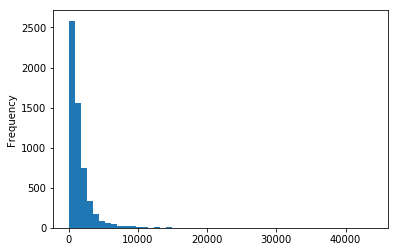

In [7]:
dataset['length'].plot(bins=50, kind='hist')

(0, 45000)

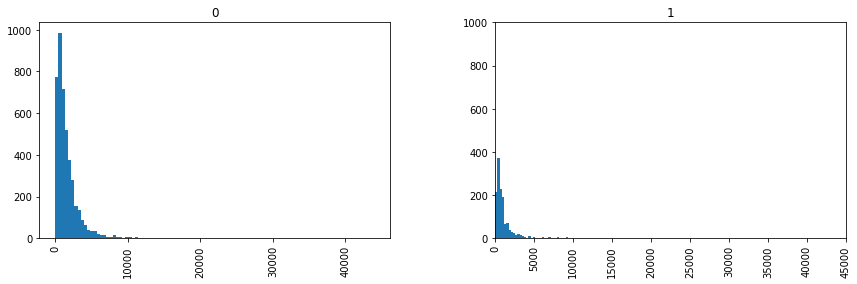

In [11]:
dataset.hist(column='length', by='spam',bins=100,figsize=(14,4))
plt.ylim(0,1000)
plt.xlim(0,45000)

In [12]:
#Using Natural Language Processing to cleaning the text to make one corpus
# Cleaning the texts
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [13]:
#Every mail starts with 'Subject :' will remove this from each text 
dataset['text']=dataset['text'].map(lambda text: text[1:])
dataset['text'] = dataset['text'].map(lambda text:re.sub('[^a-zA-Z0-9]+', ' ',text)).apply(lambda x: (x.lower()).split())
ps = PorterStemmer()
corpus=dataset['text'].apply(lambda text_list:' '.join(list(map(lambda word:ps.stem(word),(list(filter(lambda text:text not in set(stopwords.words('english')),text_list)))))))

In [14]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus.values).toarray()
y = dataset.iloc[:, 1].values

In [15]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [16]:
# Fitting Naive Bayes classifier to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
classifier.fit(X_train , y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [17]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [18]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1407   19]
 [   3  451]]


In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9882978723404255

In [20]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

0.9879409200714153

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1426
           1       0.96      0.99      0.98       454

   micro avg       0.99      0.99      0.99      1880
   macro avg       0.98      0.99      0.98      1880
weighted avg       0.99      0.99      0.99      1880

